# Project: Investigating dataset (movie data from TMDb)


## Directory
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusion</a></li>
</ul>

<a id='intro'></a>
## Introduction

    This dataset, which was queried from TMD, contains over 10000 rows of movie data.The Movie Database. Variables include viewer voting and revernue. For variables cast, genres and some other cloumns which have multiple values are separated by a vertical bar(|)during the dat-entry process. Th last two columns ending with "_adj" are the adjsuted budget and revenues after  inflation rate in 2010 is taken into account. 

3 research questions：

1.What are the most popular movie genres by year?

2.What's the relationship between movie revenue and movie genre?

3.What's the order of ROIs of diferent movie genres?


In [110]:
#loading package
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np 


<a id='wrangling'></a>
## Data Wrangling

> Load in data, check the data quality, and clean the data.

### Basic features

In [111]:
df=pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [112]:
#use info() to check data type and have a whole picture of missing data
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

#checklist: 
Totally, we have 10866 records

column with missing values:
imdb_id,cast,homepage,director,tagline,keywords,overview,genres,production_companies

incorrect data type(0),release_date, duplicates?

### Data cleaning（missing data, deplicates, mismatched data type）

In [113]:
df=df.drop_duplicates()  #remove duplicate

In [114]:
df=df.drop(['homepage'],axis=1) 
#column homepage has too many missing data and is not relevant to the research question thus it has been removed

In [115]:
df=df.dropna()  #delete missing data

In [116]:
df['release_date']=pd.to_datetime(df['release_date'])  #convert the date into proper type

In [117]:
df.info()    #new data info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7030 entries, 0 to 10865
Data columns (total 20 columns):
id                      7030 non-null int64
imdb_id                 7030 non-null object
popularity              7030 non-null float64
budget                  7030 non-null int64
revenue                 7030 non-null int64
original_title          7030 non-null object
cast                    7030 non-null object
director                7030 non-null object
tagline                 7030 non-null object
keywords                7030 non-null object
overview                7030 non-null object
runtime                 7030 non-null int64
genres                  7030 non-null object
production_companies    7030 non-null object
release_date            7030 non-null datetime64[ns]
vote_count              7030 non-null int64
vote_average            7030 non-null float64
release_year            7030 non-null int64
budget_adj              7030 non-null float64
revenue_adj             7030 non

In [118]:
# To calcualte ROI,budget_adj/revenue_adj,delete rows with value 0, by identifying indexes of rows
df.drop(df[df['budget_adj']==0].index, inplace=True)#inplace =True , edit the data based on original data, = False means creating a new data
df.drop(df[df['revenue_adj']==0].index, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3445 entries, 0 to 10848
Data columns (total 20 columns):
id                      3445 non-null int64
imdb_id                 3445 non-null object
popularity              3445 non-null float64
budget                  3445 non-null int64
revenue                 3445 non-null int64
original_title          3445 non-null object
cast                    3445 non-null object
director                3445 non-null object
tagline                 3445 non-null object
keywords                3445 non-null object
overview                3445 non-null object
runtime                 3445 non-null int64
genres                  3445 non-null object
production_companies    3445 non-null object
release_date            3445 non-null datetime64[ns]
vote_count              3445 non-null int64
vote_average            3445 non-null float64
release_year            3445 non-null int64
budget_adj              3445 non-null float64
revenue_adj             3445 non

<a id='eda'></a>
## Exploratory Data Analysis

> Statistics, Data visualization,one variable will be evaluated at a time.

### Research Question 1 What are the most popular movie genres by year?

In [119]:
#filter by genres, revenure_adj,release_year. The metric for popularity here is defined by revenue
genres_rev_year=df[['genres','revenue_adj','release_year']]
genres_rev_year.head()

,genres,revenue_adj,release_year
0,Action|Adventure|Science Fiction|Thriller,1.392446e+09,2015
1,Action|Adventure|Science Fiction|Thriller,3.481613e+08,2015
2,Adventure|Science Fiction|Thriller,2.716190e+08,2015
3,Action|Adventure|Science Fiction|Fantasy,1.902723e+09,2015
4,Action|Crime|Thriller,1.385749e+09,2015


In [120]:
#seperate the genres. After stacking, we found that there are two levels
#of index, in order to match the orginal index, we will drop index from level 1
#Stack the prescribed level(s) from columns to index.

genres=genres_rev_year['genres'].str.split('|',expand=True).stack()
genres.head()

0  0             Action
   1          Adventure
   2    Science Fiction
   3           Thriller
1  0             Action
dtype: object

In [121]:
# drop level 1 index
genres.index=genres.index.droplevel(level=1) # level starts with 0

In [122]:
#change to dataframe for merging
genres=genres.to_frame(name='new_genres')
genres.head()

,new_genres
0,Action
0,Adventure
0,Science Fiction
0,Thriller
1,Action


In [123]:
#pd.merge() could merge on column as well as index
genres_rev_year_merge=pd.merge(genres_rev_year,genres,left_index=True,right_index=True)
genres_rev_year_merge.head()

,genres,revenue_adj,release_year,new_genres
0,Action|Adventure|Science Fiction|Thriller,1.392446e+09,2015,Action
0,Action|Adventure|Science Fiction|Thriller,1.392446e+09,2015,Adventure
0,Action|Adventure|Science Fiction|Thriller,1.392446e+09,2015,Science Fiction
0,Action|Adventure|Science Fiction|Thriller,1.392446e+09,2015,Thriller
1,Action|Adventure|Science Fiction|Thriller,3.481613e+08,2015,Action


In [124]:
#for better observation，drop the column 'genres'
genres_rev_year_merge=genres_rev_year_merge.drop(['genres'],axis=1)
genres_rev_year_merge.head() # now we have corresponding 

,revenue_adj,release_year,new_genres
0,1.392446e+09,2015,Action
0,1.392446e+09,2015,Adventure
0,1.392446e+09,2015,Science Fiction
0,1.392446e+09,2015,Thriller
1,3.481613e+08,2015,Action


In [125]:
#To get revenue by year, we firstly group by release_year and new_genres, and then calculate the sum and sort in descending order
genres_rev_year_merge=genres_rev_year_merge.groupby(['release_year','new_genres']).sum().sort_values(by=['release_year','revenue_adj'])
genres_rev_year_merge.head()

revenue_adj
release_year new_genres              
1960         Adventure   3.616441e+07
             Western     3.616441e+07
             Comedy      1.843242e+08
             Romance     1.843242e+08
             Horror      2.359350e+08

In [126]:
#reset index
genres_rev_year_merge.reset_index().head()

,release_year,new_genres,revenue_adj
0,1960,Adventure,3.616441e+07
1,1960,Western,3.616441e+07
2,1960,Comedy,1.843242e+08
3,1960,Romance,1.843242e+08
4,1960,Horror,2.359350e+08


In [127]:
genres_rev_year_merge.reset_index().groupby('release_year')

In [128]:
#To retrieve the highest revenue by year, reset the index and group by release year, use tail(1) to acquire the top revenue
#Since it has been sorted in the previous cells, here tail(1) could help us extract the highest revenue
results=genres_rev_year_merge.reset_index().groupby('release_year').tail(1)
results.head()

,release_year,new_genres,revenue_adj
8,1960,Drama,8.626372e+08
20,1961,Adventure,1.785636e+09
28,1962,Adventure,1.294637e+09
38,1963,Thriller,6.933157e+08
50,1964,Music,1.232218e+09


In [129]:
groups=results.groupby('new_genres')

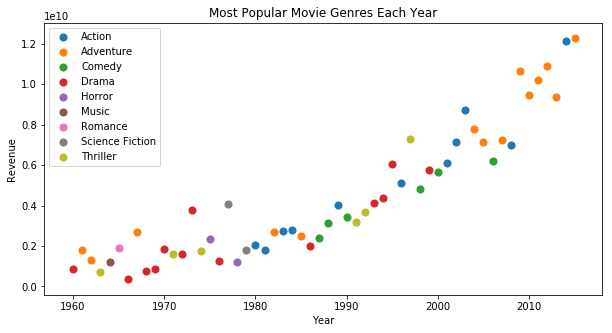

In [130]:
#plotting
groups=results.groupby('new_genres')

plt.figure(figsize=(10,5))
plt.title('Most Popular Movie Genres Each Year')
plt.xlabel('Year')
plt.ylabel('Revenue')

for name,group in groups:
    plt.scatter(group['release_year'], group['revenue_adj'], label=name, s=50)
    
plt.legend()

plt.show()

Via for loop, we plotted a scatter plot that presents the most populat movie genres each year. The x-axis is year while the y-axis indicates revenue. Apparently, we could spot a rising popularity of movie, whereas different movie genres have varied popularity as time went by. For example, in 1990s, thriller, comedy and drama were more popular while in the beiginning of 21 century. Adventure and action movie gain back their dominant status after their loss in the 90s.

### Research Question 2 What's the relationship between movie revenue and movie genre?

In [131]:
# To explore the relationship between movie genres and revenue, we only need two columns
rev_genres=genres_rev_year_merge.reset_index()

In [132]:
rev_genres.drop(['release_year'],axis=1,inplace=True)
rev_genres.head(10)

,new_genres,revenue_adj
0,Adventure,3.616441e+07
1,Western,3.616441e+07
2,Comedy,1.843242e+08
3,Romance,1.843242e+08
4,Horror,2.359350e+08
5,Thriller,2.359350e+08
6,History,4.423780e+08
7,Action,4.785425e+08
8,Drama,8.626372e+08
9,Horror,1.458972e+07


In [133]:
#Groupby movie genres, calculate the sum and sort the values
rev_genres=rev_genres.groupby('new_genres').sum().sort_values(by=['revenue_adj'],ascending=False)


In [134]:
rev_genres
#new_genres is the row index here

,revenue_adj
new_genres,
Action,2.083030e+11
Adventure,1.988231e+11
Drama,1.698057e+11
Comedy,1.582638e+11
Thriller,1.502827e+11
Science Fiction,1.036798e+11
Family,1.006951e+11
Fantasy,9.668798e+10
Romance,7.102994e+10


Text(0, 0.5, 'Genres')

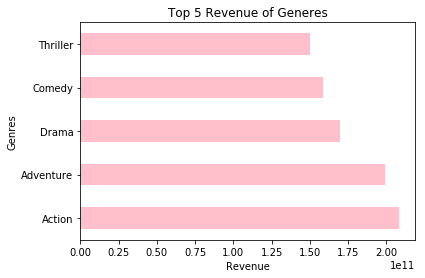

In [135]:
#5 most popular movie genres(top 5)
top_five_genres=rev_genres.head(5)
top_five_genres['revenue_adj'].plot(kind='barh',color='pink');
plt.title('Top 5 Revenue of Generes')
plt.xlabel('Revenue')
plt.ylabel('Genres')

From the graph we could tell that the top 5 movie genres are Action, Adventure, Drama, Comedy and Thriller.

### Research Question 3 What's the order of ROIs of diferent movie genres? Which movie genres has the highest ROI?

In [136]:
#fotmula for ROI:（'revenue_adj'-'budget_adj'）/'budget_adj'
genres_bud_rev=df[['genres','revenue_adj','budget_adj']]
genres_bud_rev.head()

,genres,revenue_adj,budget_adj
0,Action|Adventure|Science Fiction|Thriller,1.392446e+09,1.379999e+08
1,Action|Adventure|Science Fiction|Thriller,3.481613e+08,1.379999e+08
2,Adventure|Science Fiction|Thriller,2.716190e+08,1.012000e+08
3,Action|Adventure|Science Fiction|Fantasy,1.902723e+09,1.839999e+08
4,Action|Crime|Thriller,1.385749e+09,1.747999e+08


In [137]:
#ROI
roi=(genres_bud_rev['revenue_adj']-genres_bud_rev['budget_adj'])/genres_bud_rev['budget_adj']
roi.head()

0    9.090192
1    1.522909
2    1.683984
3    9.340891
4    6.927628
dtype: float64

In [138]:
#convert to dataframe 
roi=roi.to_frame(name='ROI')
roi.head()

,ROI
0,9.090192
1,1.522909
2,1.683984
3,9.340891
4,6.927628


In [139]:
#merge with genres_rev_year_merge
genres_roi=pd.merge(genres_bud_rev,roi,left_index=True,right_index=True)
genres_roi.head()

,genres,revenue_adj,budget_adj,ROI
0,Action|Adventure|Science Fiction|Thriller,1.392446e+09,1.379999e+08,9.090192
1,Action|Adventure|Science Fiction|Thriller,3.481613e+08,1.379999e+08,1.522909
2,Adventure|Science Fiction|Thriller,2.716190e+08,1.012000e+08,1.683984
3,Action|Adventure|Science Fiction|Fantasy,1.902723e+09,1.839999e+08,9.340891
4,Action|Crime|Thriller,1.385749e+09,1.747999e+08,6.927628


In [140]:
genres_roi=pd.merge(genres_roi,genres,left_index=True,right_index=True)
genres_roi.head()

,genres,revenue_adj,budget_adj,ROI,new_genres
0,Action|Adventure|Science Fiction|Thriller,1.392446e+09,1.379999e+08,9.090192,Action
0,Action|Adventure|Science Fiction|Thriller,1.392446e+09,1.379999e+08,9.090192,Adventure
0,Action|Adventure|Science Fiction|Thriller,1.392446e+09,1.379999e+08,9.090192,Science Fiction
0,Action|Adventure|Science Fiction|Thriller,1.392446e+09,1.379999e+08,9.090192,Thriller
1,Action|Adventure|Science Fiction|Thriller,3.481613e+08,1.379999e+08,1.522909,Action


In [141]:
#drop redundant columns
genres_roi.drop(['genres','revenue_adj','budget_adj'],axis=1,inplace=True)

In [142]:
#top 5 ROI
top5_roi=genres_roi.groupby('new_genres').mean().sort_values(by=['ROI'],ascending=False).head()
top5_roi.head()

,ROI
new_genres,
Family,2635.252718
Romance,1853.270168
Adventure,1462.782775
Action,1008.208475
Drama,733.227936


Text(0, 0.5, 'Genres')

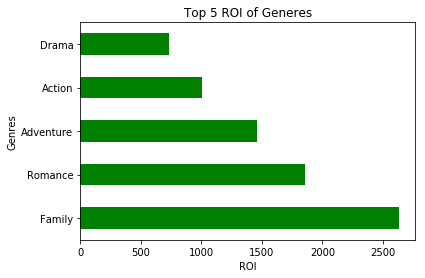

In [143]:
#plotting
top5_roi['ROI'].plot(kind='barh',color='green')
plt.title('Top 5 ROI of Generes')
plt.xlabel('ROI')
plt.ylabel('Genres')

From the bar chart, we could tell that the top 5 ROI movie types are Family, Romance, Adventure, Action and Drama.

<a id='conclusions'></a>
## Conclusion

>**Limitation** Originally, there are 10866 entries，but thanks to missing data abd duplicated data, we only used  3445 entries for analysis. Also, since some outliers in revenue_adj or in budget_adj were removed from the dataset, bias exists.

>**Data Selection** This research majorly made use of variables like movie genre, release year, revenue, budget and so on. Accounting for one third of the raw dataset, these 3445 data were less representative and biased to some extent. 

>**Conclusion1**：From 1960 to 2015, the revenue of the most popular type of movie increases consistently. During 1960-1970 stage, drama was the most welcoming movie genre to general public while adventure took over the first place as we entered 21 century.

>**Conclusion2**：From 1960 to 2015, the top 5 movie genres which earned the most areAction, Adventure, Drama, Comedy and Thriller.

>**Conclusion3**：Top 5 ROI movie genres are Family, Romance, Adventure, Action and Drama.


In [144]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255